<a href="https://colab.research.google.com/github/Abishethvarman/FakeNewsDetection/blob/main/Sentiment_Analysis_VADER_FakeNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sentiment Analysis on VADER https://www.youtube.com/watch?v=QpzMWQvxXWk

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

In [3]:
%cd /mydrive/dataset/

/content/gdrive/My Drive/dataset


In [4]:
df_reliable = pd.read_csv("Reliable.csv")
df_fake = pd.read_csv("Fake.csv")

In [5]:
df_reliable['isfake'] = 0
df_fake['isfake'] = 1

In [6]:
df_reliable.shape

(21417, 5)

In [8]:
df_fake.shape

(23481, 5)

In [9]:
print(df_reliable['subject'].unique())
print(df_fake['subject'].unique())

['politicsNews' 'worldnews']
['News' 'politics' 'Government News' 'left-news' 'US_News' 'Middle-east']


In [10]:
df = pd.concat([df_reliable, df_fake]).reset_index(drop = True)

In [11]:
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
44893  21st Century Wire says As 21WIRE reported earl...   Middle-east   
44894  21st Century Wire says It s a familiar theme. ...   Middle-east   
44895  Patrick Henningsen  21st Century WireRemember ...   Middle-east   
44896  21st Century Wire says Al Jazeera America will...   Middle-east   
44897  21st Century Wire says As 21WIRE predicted in ...   Middle-east   

                     date  isfake  
0      December 31, 2017        0  
1      December 29, 2017        0  
2      December 31, 2017        0  
3      December 30, 2017        0  
4      December 29, 2017        0  
...                   ...     ...  
44893    January 16, 2016       1  
44894    January 16, 2016       1  
44895    January 15, 2016       1  
44896    January 14, 2016       1  
44897    January 12, 2016       1  

[44898 rows x 5 columns]

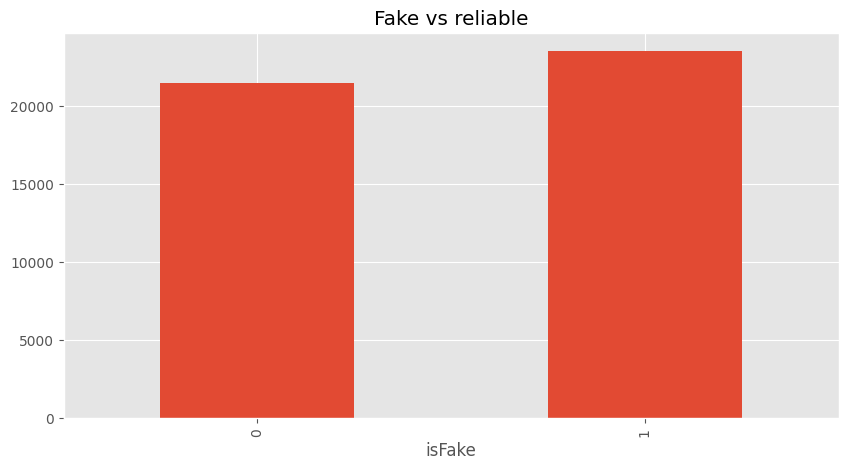

In [13]:
ax = df['isfake'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Fake vs reliable',
          figsize=(10, 5))
ax.set_xlabel('isFake')
plt.show()

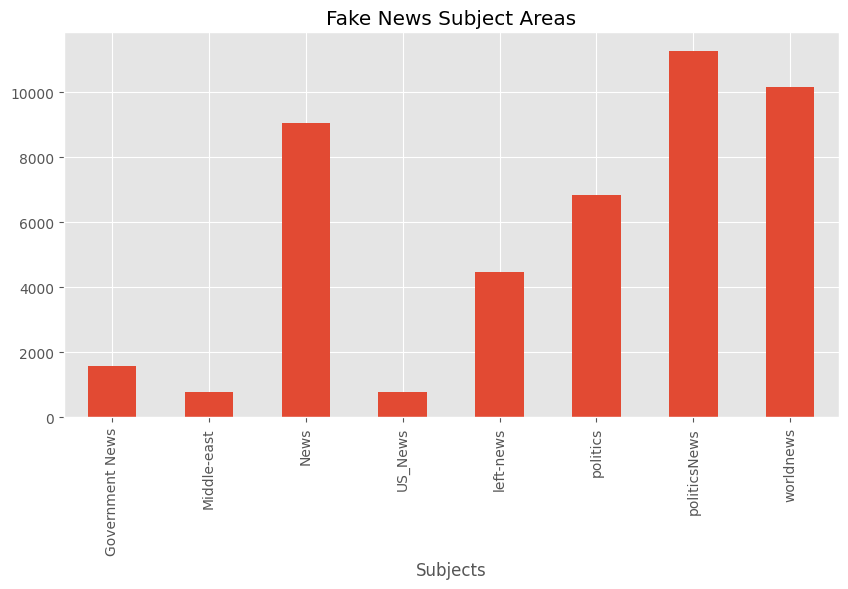

In [14]:
ax = df['subject'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Fake News Subject Areas',
          figsize=(10, 5))
ax.set_xlabel('Subjects')
plt.show()

In [ ]:
sentiment_mapping = {
    'politicsNews': 0,
    'worldnews': 1,
    'News': 2,
    'politics': 3,
    'Government News': 4,
    'left-news': 5,
    'Middle-east': 6
}

df['sentiment'] = df['subject'].map(sentiment_mapping)


In [15]:
df['original'] = df['title'] + ' ' + df['text']
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  isfake  \
0  December 31, 2017        0   
1  December 29, 2017        0   
2  December 31, 2017        0   
3  December 30, 2017        0   
4  December 29, 2017        0   

                                            original  
0  As U.S. budget fight looms, Republicans flip t...  
1  U.S. military to accept transgender recruits o...  
2  Senior U.S. Republican senator: 'Let Mr. Muell...  
3  FBI Russia probe helped by Australian diplomat...  
4  Trump wants Postal Service to charge 'much mor...

In [17]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
!pip install gensim

In [30]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

In [31]:
from gensim.parsing.preprocessing import STOPWORDS, remove_stopword_tokens
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)

    return result


In [33]:
# #Tokenization
# text = df['text']
# tokens = nltk.word_tokenize(example)
# tokens[:10]


In [34]:
# Apply the function to the dataframe
df['clean'] = df['original'].apply(preprocess)

In [35]:
print(df['clean'][0])

['budget', 'fight', 'looms', 'republicans', 'flip', 'fiscal', 'script', 'washington', 'reuters', 'head', 'conservative', 'republican', 'faction', 'congress', 'voted', 'month', 'huge', 'expansion', 'national', 'debt', 'cuts', 'called', 'fiscal', 'conservative', 'sunday', 'urged', 'budget', 'restraint', 'keeping', 'sharp', 'pivot', 'republicans', 'representative', 'mark', 'meadows', 'speaking', 'face', 'nation', 'drew', 'hard', 'line', 'federal', 'spending', 'lawmakers', 'bracing', 'battle', 'january', 'return', 'holidays', 'wednesday', 'lawmakers', 'begin', 'trying', 'pass', 'federal', 'budget', 'fight', 'likely', 'linked', 'issues', 'immigration', 'policy', 'november', 'congressional', 'election', 'campaigns', 'approach', 'republicans', 'seek', 'control', 'congress', 'president', 'donald', 'trump', 'republicans', 'want', 'budget', 'increase', 'military', 'spending', 'democrats', 'want', 'proportional', 'increases', 'defense', 'discretionary', 'spending', 'programs', 'support', 'educati

In [36]:
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)

In [37]:
list_of_words

['budget',
 'fight',
 'looms',
 'republicans',
 'flip',
 'fiscal',
 'script',
 'washington',
 'reuters',
 'head',
 'conservative',
 'republican',
 'faction',
 'congress',
 'voted',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'cuts',
 'called',
 'fiscal',
 'conservative',
 'sunday',
 'urged',
 'budget',
 'restraint',
 'keeping',
 'sharp',
 'pivot',
 'republicans',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'face',
 'nation',
 'drew',
 'hard',
 'line',
 'federal',
 'spending',
 'lawmakers',
 'bracing',
 'battle',
 'january',
 'return',
 'holidays',
 'wednesday',
 'lawmakers',
 'begin',
 'trying',
 'pass',
 'federal',
 'budget',
 'fight',
 'likely',
 'linked',
 'issues',
 'immigration',
 'policy',
 'november',
 'congressional',
 'election',
 'campaigns',
 'approach',
 'republicans',
 'seek',
 'control',
 'congress',
 'president',
 'donald',
 'trump',
 'republicans',
 'want',
 'budget',
 'increase',
 'military',
 'spending',
 'democrats',
 'want',
 'proportional',
 '

In [38]:
len(list_of_words)
total_words = len(list(set(list_of_words)))
total_words

108704

In [39]:
df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x))
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
44893  21st Century Wire says As 21WIRE reported earl...   Middle-east   
44894  21st Century Wire says It s a familiar theme. ...   Middle-east   
44895  Patrick Henningsen  21st Century WireRemember ...   Middle-east   
44896  21st Century Wire says Al Jazeera America will...   Middle-east   
44897  21st Century Wire says As 21WIRE predicted in ...   Middle-east   

                     date  isfake  \
0      December 31, 2017        0   
1      December 29, 2017        0   
2      December 31, 2017        0   
3      December 30, 2017        0   
4      December 29, 2017        0   
...                   ...     ...   
44893    January 16, 2016       1   
44894    January 16, 2016       1   
44895    January 15, 2016       1   
44896    January 14, 2016       1   
44897    January 12, 2016       1   

                                                original  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                   clean  \
0      [budget, fight, looms, republicans, flip, fisc...   
1      [military, accept, transgender, recruits, mond...   
2      [senior, republican, senator, mueller, washing...   
3      [russia, probe, helped, australian, diplomat, ...   
4      [trump, wants, postal, service, charge, amazon...   
...                                                  ...   
44893  [mcpain, john, mccain, furious, iran, treated,...   
44894  [justice, yahoo, settles, mail, privacy, class...   
44895  [sunnistan, allied, safe, zone, plan, territor...   
44896  [blow, million, jazeera, america, finally, cal...   
44897  [navy, sailors, held, iranian, military, signs...   

                                            clean_joined  
0      budget fight looms republicans flip fiscal scr...  
1      military accept transgender recruits monday pe...  
2      senior republican senator mueller washington r...  
3      russia probe helped australian diplomat washin...  
4      trump wants postal service charge amazon shipm...  
...                                                  ...  
44893  mcpain john mccain furious iran treated sailor...  
44894  justice yahoo settles mail privacy class actio...  
44895  sunnistan allied

In [41]:
example = df['clean_joined']
print(example)

0        budget fight looms republicans flip fiscal scr...
1        military accept transgender recruits monday pe...
2        senior republican senator mueller washington r...
3        russia probe helped australian diplomat washin...
4        trump wants postal service charge amazon shipm...
                               ...                        
44893    mcpain john mccain furious iran treated sailor...
44894    justice yahoo settles mail privacy class actio...
44895    sunnistan allied safe zone plan territorial bo...
44896    blow million jazeera america finally calls qui...
44897    navy sailors held iranian military signs neoco...
Name: clean_joined, Length: 44898, dtype: object


In [43]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [45]:
# tokens = nltk.word_tokenize(example)
tokens = nltk.word_tokenize(str(example))
tokens[:10]

['0',
 'budget',
 'fight',
 'looms',
 'republicans',
 'flip',
 'fiscal',
 'scr',
 '...',
 '1']

In [53]:
 nltk.download('averaged_perceptron_tagger')
 nltk.download('maxent_ne_chunker')
 nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [48]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('0', 'CD'),
 ('budget', 'NN'),
 ('fight', 'NN'),
 ('looms', 'VBZ'),
 ('republicans', 'NNS'),
 ('flip', 'JJ'),
 ('fiscal', 'JJ'),
 ('scr', 'NN'),
 ('...', ':'),
 ('1', 'CD')]

In [54]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  0/CD
  budget/NN
  fight/NN
  looms/VBZ
  republicans/NNS
  flip/JJ
  fiscal/JJ
  scr/NN
  .../:
  1/CD
  military/JJ
  accept/NN
  transgender/NN
  recruits/NNS
  monday/VBP
  pe/NN
  .../:
  2/CD
  senior/JJ
  republican/JJ
  senator/NN
  mueller/NN
  washington/NN
  r/NN
  .../:
  3/CD
  russia/NN
  probe/NN
  helped/VBD
  australian/JJ
  diplomat/NN
  washin/NN
  .../:
  4/CD
  trump/NN
  wants/VBZ
  postal/JJ
  service/NN
  charge/NN
  amazon/JJ
  shipm/NN
  .../:
  .../:
  44893/CD
  mcpain/NN
  john/NN
  mccain/VBP
  furious/JJ
  iran/NN
  treated/VBD
  sailor/NN
  .../:
  44894/CD
  justice/NN
  yahoo/NN
  settles/NNS
  mail/VBP
  privacy/NN
  class/NN
  actio/NN
  .../:
  44895/CD
  sunnistan/NN
  allied/VBD
  safe/JJ
  zone/NN
  plan/NN
  territorial/JJ
  bo/NN
  .../:
  44896/CD
  blow/NN
  million/CD
  jazeera/NN
  america/NN
  finally/RB
  calls/VBZ
  qui/NN
  .../:
  44897/CD
  navy/JJ
  sailors/NNS
  held/VBD
  iranian/JJ
  military/JJ
  signs/NNS
  neoco/VBP
  .../

In [56]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [58]:
sia.polarity_scores('As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non')

{'neg': 0.101, 'neu': 0.84, 'pos': 0.059, 'compound': -0.7269}

In [60]:
sia.polarity_scores(str(example))

{'neg': 0.087, 'neu': 0.796, 'pos': 0.117, 'compound': 0.4019}

In [68]:
df['id'] = df.index + 1

In [69]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['text']
    myid = row['id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/44898 [00:00<?, ?it/s]

In [71]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'id'})
vaders = vaders.merge(df, how='left')

In [73]:
vaders.tail()

id    neg    neu    pos  compound  \
44893  44894  0.102  0.787  0.111    0.7675   
44894  44895  0.054  0.853  0.093    0.9429   
44895  44896  0.130  0.767  0.103   -0.9994   
44896  44897  0.081  0.834  0.085    0.4589   
44897  44898  0.136  0.806  0.057   -0.9978   

                                                   title  \
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
44893  21st Century Wire says As 21WIRE reported earl...  Middle-east   
44894  21st Century Wire says It s a familiar theme. ...  Middle-east   
44895  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
44896  21st Century Wire says Al Jazeera America will...  Middle-east   
44897  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                   date  isfake  \
44893  January 16, 2016       1   
44894  January 16, 2016       1   
44895  January 15, 2016       1   
44896  January 14, 2016       1   
44897  January 12, 2016       1   

                                                original  \
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                   clean  \
44893  [mcpain, john, mccain, furious, iran, treated,...   
44894  [justice, yahoo, settles, mail, privacy, class...   
44895  [sunnistan, allied, safe, zone, plan, territor...   
44896  [blow, million, jazeera, america, finally, cal...   
44897  [navy, sailors, held, iranian, military, signs...   

                                            clean_joined  
44893  mcpain john mccain furious iran treated sailor...  
44894  justice yahoo settles mail privacy class actio...  
44895  sunnistan allied safe zone plan territorial bo...  
44896  blow million jazeera america finally calls qui...  
44897  navy sailors held iranian military signs neoco...

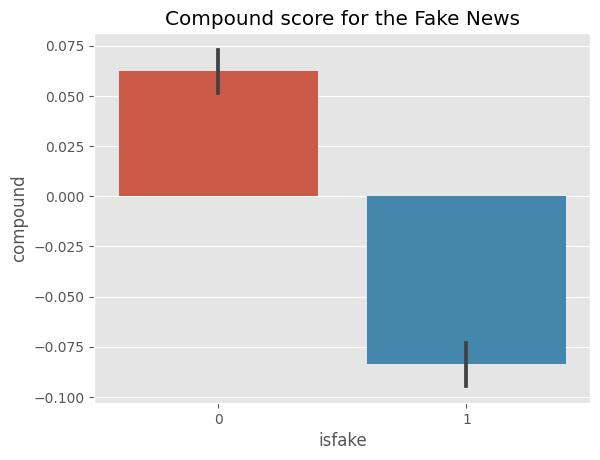

In [75]:
ax = sns.barplot(data=vaders, x='isfake', y='compound')
ax.set_title('Compound score for the Fake News')
plt.show()

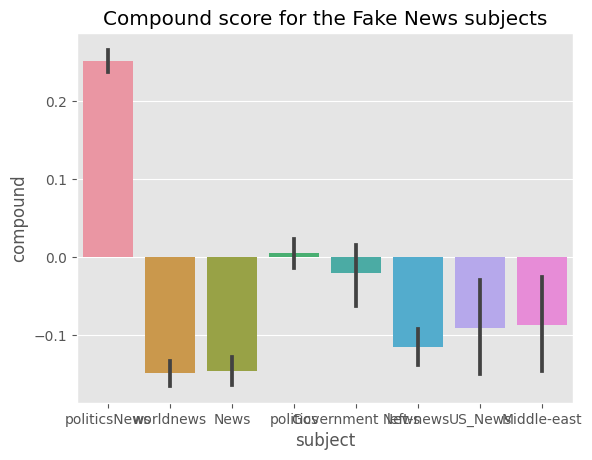

In [76]:
ax = sns.barplot(data=vaders, x='subject', y='compound')
ax.set_title('Compound score for the Fake News subjects')
plt.show()

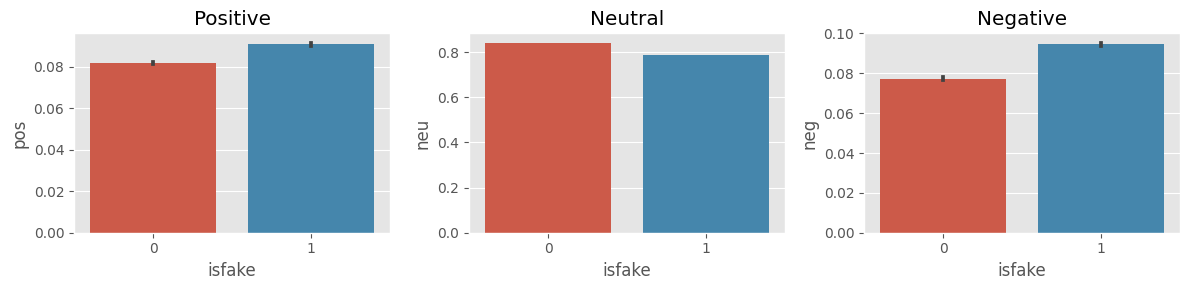

In [80]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='isfake', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='isfake', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='isfake', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [81]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [82]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [84]:
# VADER results on example
print(example)
sia.polarity_scores(str(example))

0        budget fight looms republicans flip fiscal scr...
1        military accept transgender recruits monday pe...
2        senior republican senator mueller washington r...
3        russia probe helped australian diplomat washin...
4        trump wants postal service charge amazon shipm...
                               ...                        
44893    mcpain john mccain furious iran treated sailor...
44894    justice yahoo settles mail privacy class actio...
44895    sunnistan allied safe zone plan territorial bo...
44896    blow million jazeera america finally calls qui...
44897    navy sailors held iranian military signs neoco...
Name: clean_joined, Length: 44898, dtype: object


{'neg': 0.087, 'neu': 0.796, 'pos': 0.117, 'compound': 0.4019}

In [86]:
# Run for Roberta Model
encoded_text = tokenizer(str(example), return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.24135256, 'roberta_neu': 0.7031134, 'roberta_pos': 0.05553405}


In [87]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [91]:
# res = {}
# for i, row in tqdm(df.iterrows(), total=len(df)):
#     try:
#         text = row['text']
#         myid = row['id']
#         vader_result = sia.polarity_scores(text)
#         vader_result_rename = {}
#         for key, value in vader_result.items():
#             vader_result_rename[f"vader_{key}"] = value
#         roberta_result = polarity_scores_roberta(text)
#         both = {**vader_result_rename, **roberta_result}
#         res[myid] = both
#     except RuntimeError:
#         print(f'Broke for id {myid}')

# First 500 texts
res = {}
num_rows_to_process = 500

for i, row in tqdm(df.head(num_rows_to_process).iterrows(), total=num_rows_to_process):
    try:
        text = row['text']
        myid = row['id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')


  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 1
Broke for id 2
Broke for id 3
Broke for id 5
Broke for id 6
Broke for id 7
Broke for id 12
Broke for id 16
Broke for id 17
Broke for id 21
Broke for id 22
Broke for id 25
Broke for id 30
Broke for id 35
Broke for id 36
Broke for id 37
Broke for id 38
Broke for id 39
Broke for id 43
Broke for id 45
Broke for id 47
Broke for id 52
Broke for id 53
Broke for id 55
Broke for id 59
Broke for id 60
Broke for id 61
Broke for id 63
Broke for id 65
Broke for id 66
Broke for id 67
Broke for id 68
Broke for id 72
Broke for id 75
Broke for id 76
Broke for id 77
Broke for id 78
Broke for id 80
Broke for id 81
Broke for id 84
Broke for id 86
Broke for id 88
Broke for id 93
Broke for id 98
Broke for id 100
Broke for id 101
Broke for id 102
Broke for id 109
Broke for id 110
Broke for id 114
Broke for id 115
Broke for id 118
Broke for id 126
Broke for id 128
Broke for id 129
Broke for id 136
Broke for id 139
Broke for id 140
Broke for id 142
Broke for id 143
Broke for id 144
Broke for id 

In [93]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'id'})
results_df = results_df.merge(df, how='left')

In [94]:
results_df.columns

Index(['id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'title', 'text', 'subject',
       'date', 'isfake', 'original', 'clean', 'clean_joined'],
      dtype='object')

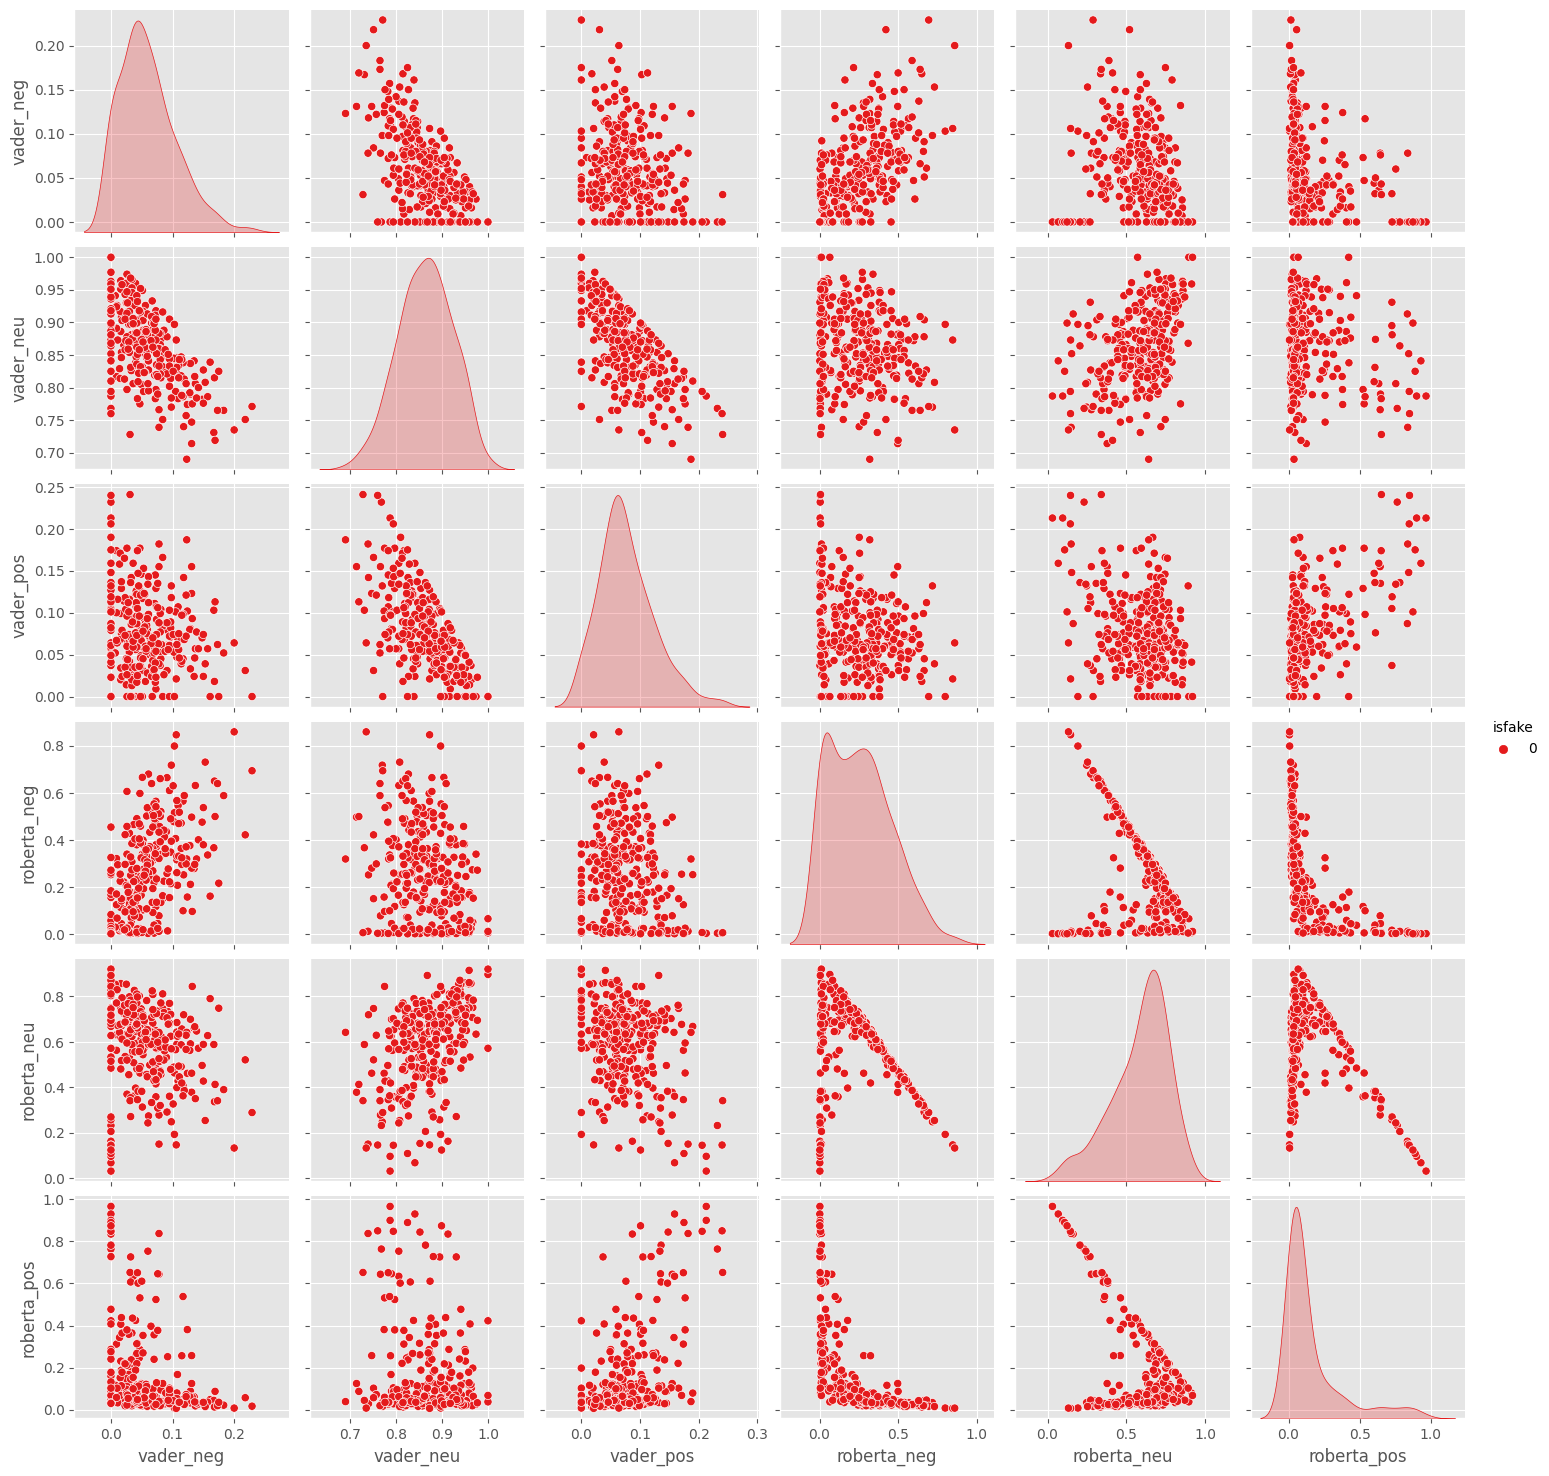

In [102]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos',],
            hue='isfake',
            palette='Set1')
plt.show()

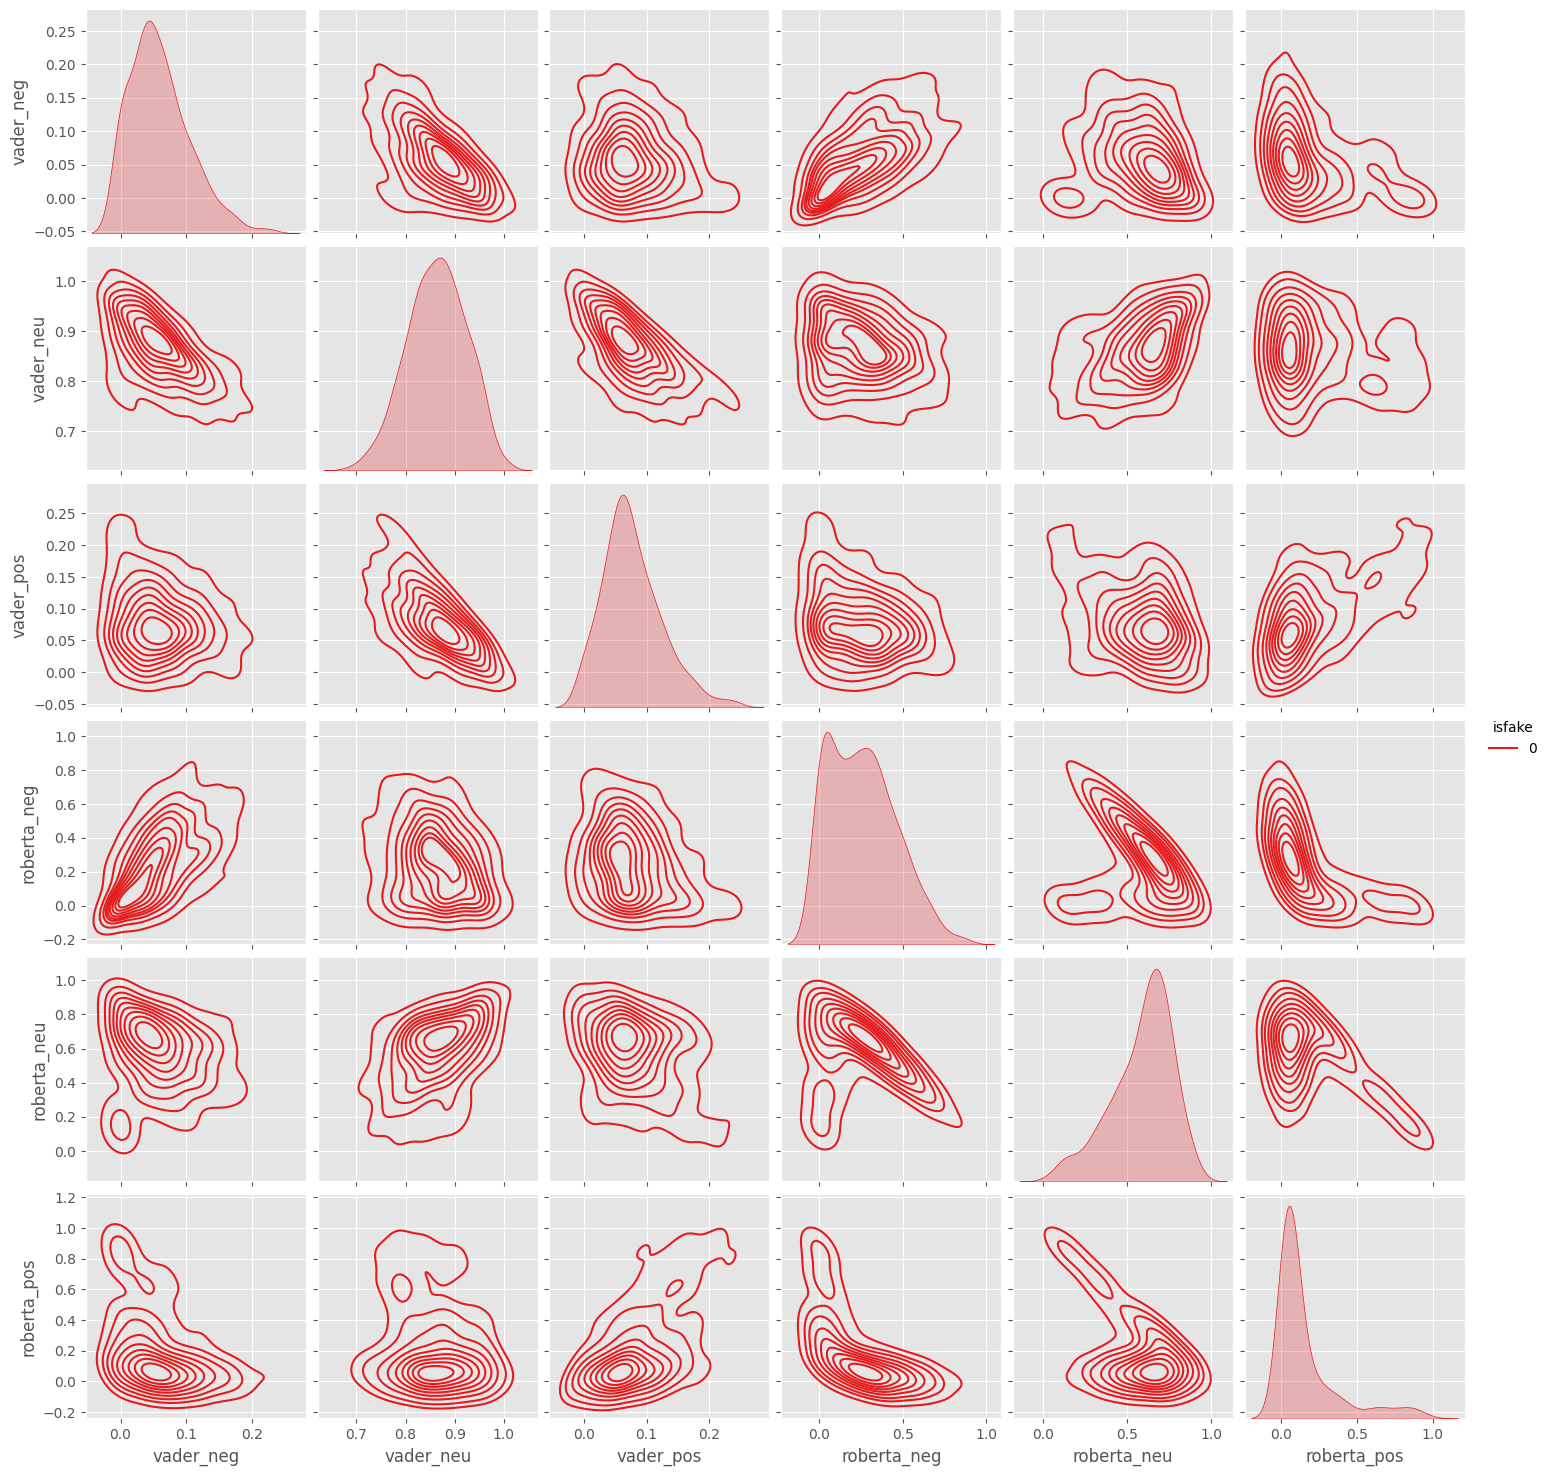

In [104]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos',],
            hue='isfake',
            kind="kde",
            palette='Set1')
plt.show()

In [107]:
# for reliable news roberta
results_df.query('isfake == 0') \
    .sort_values('roberta_pos', ascending=False)['text'].values[0]

'The following statements\xa0were posted to the verified Twitter accounts of U.S. President Donald Trump, @realDonaldTrump and @POTUS.  The opinions expressed are his own.\xa0Reuters has not edited the statements or confirmed their accuracy.  @realDonaldTrump : - To each member of the graduating class from the National Academy at Quantico, CONGRATULATIONS! [1235 EST] - You are always there for us – THE MEN AND WOMEN IN BLUE. Thank you to our police, thank you to our sheriffs, and thank you to our law enforcement families. God Bless you all, and GOD BLESS AMERICA! #LESM [1428 EST] - Today, it was my tremendous honor to visit Marine Helicopter Squadron One (HMX-1) at the Marine Corps Air Facility in Quantico, Virginia. I am honored to serve as your Commander-in-Chief. On behalf of an entire Nation, THANK YOU for your sacrifice and service. We love you!  [1658 EST]  - DOW, S&P 500 and NASDAQ close at record highs! #MAGA [1900 EST] -- Source link: (bit.ly/2jBh4LU) (bit.ly/2jpEXYR) '

In [112]:
# for Fake news  in Roberta
results_df.query('isfake == 1') \
    .sort_values('roberta_pos', ascending=False)['text'].values[0]

'The following statements\xa0were posted to the verified Twitter accounts of U.S. President Donald Trump, @realDonaldTrump and @POTUS.  The opinions expressed are his own.\xa0Reuters has not edited the statements or confirmed their accuracy.  @realDonaldTrump : - To each member of the graduating class from the National Academy at Quantico, CONGRATULATIONS! [1235 EST] - You are always there for us – THE MEN AND WOMEN IN BLUE. Thank you to our police, thank you to our sheriffs, and thank you to our law enforcement families. God Bless you all, and GOD BLESS AMERICA! #LESM [1428 EST] - Today, it was my tremendous honor to visit Marine Helicopter Squadron One (HMX-1) at the Marine Corps Air Facility in Quantico, Virginia. I am honored to serve as your Commander-in-Chief. On behalf of an entire Nation, THANK YOU for your sacrifice and service. We love you!  [1658 EST]  - DOW, S&P 500 and NASDAQ close at record highs! #MAGA [1900 EST] -- Source link: (bit.ly/2jBh4LU) (bit.ly/2jpEXYR) '

In [ ]:
#for fake news in VADER
results_df.query('isfake == 1') \
    .sort_values('vader_pos', ascending=False)['text'].values[0]

In [114]:
#for relibale news in VADER
results_df.query('isfake == 0') \
    .sort_values('vader_pos', ascending=False)['text'].values[0]

'BRUSSELS (Reuters) - U.S. Secretary of State Rex Tillerson on Tuesday said the United States remains committed to Europe, offering a public statement of support for European allies worried about foreign policy under President Donald Trump. “The partnership between America and the European Union... is based upon shared values, shared objectives for security and prosperity on both sides of the Atlantic and we remain committed to that,” Tillerson said before a lunch with 28 EU foreign ministers.  Tillerson, in brief statements with EU foreign policy chief Federica Mogherini after which the two took no questions, said his visit showed “the strong commitment the U.S. has to the European alliance, the important role that the European alliance plays in our shared security objectives.” '

In [115]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [119]:
sent_pipeline(str(example))

[{'label': 'NEGATIVE', 'score': 0.9896502494812012}]

In [121]:
from wordcloud import WordCloud

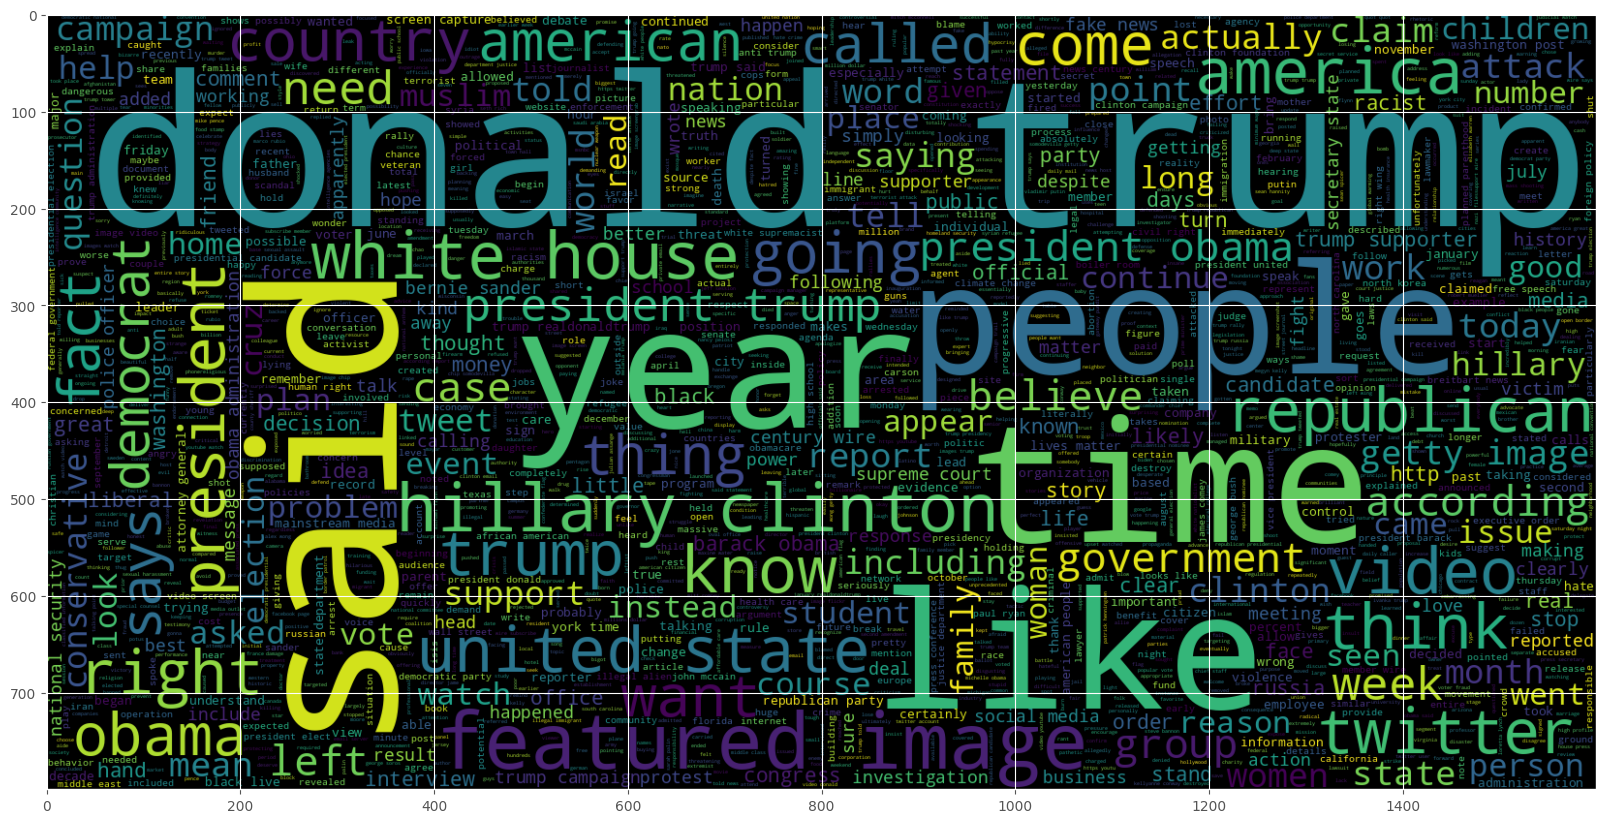

In [122]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 1].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

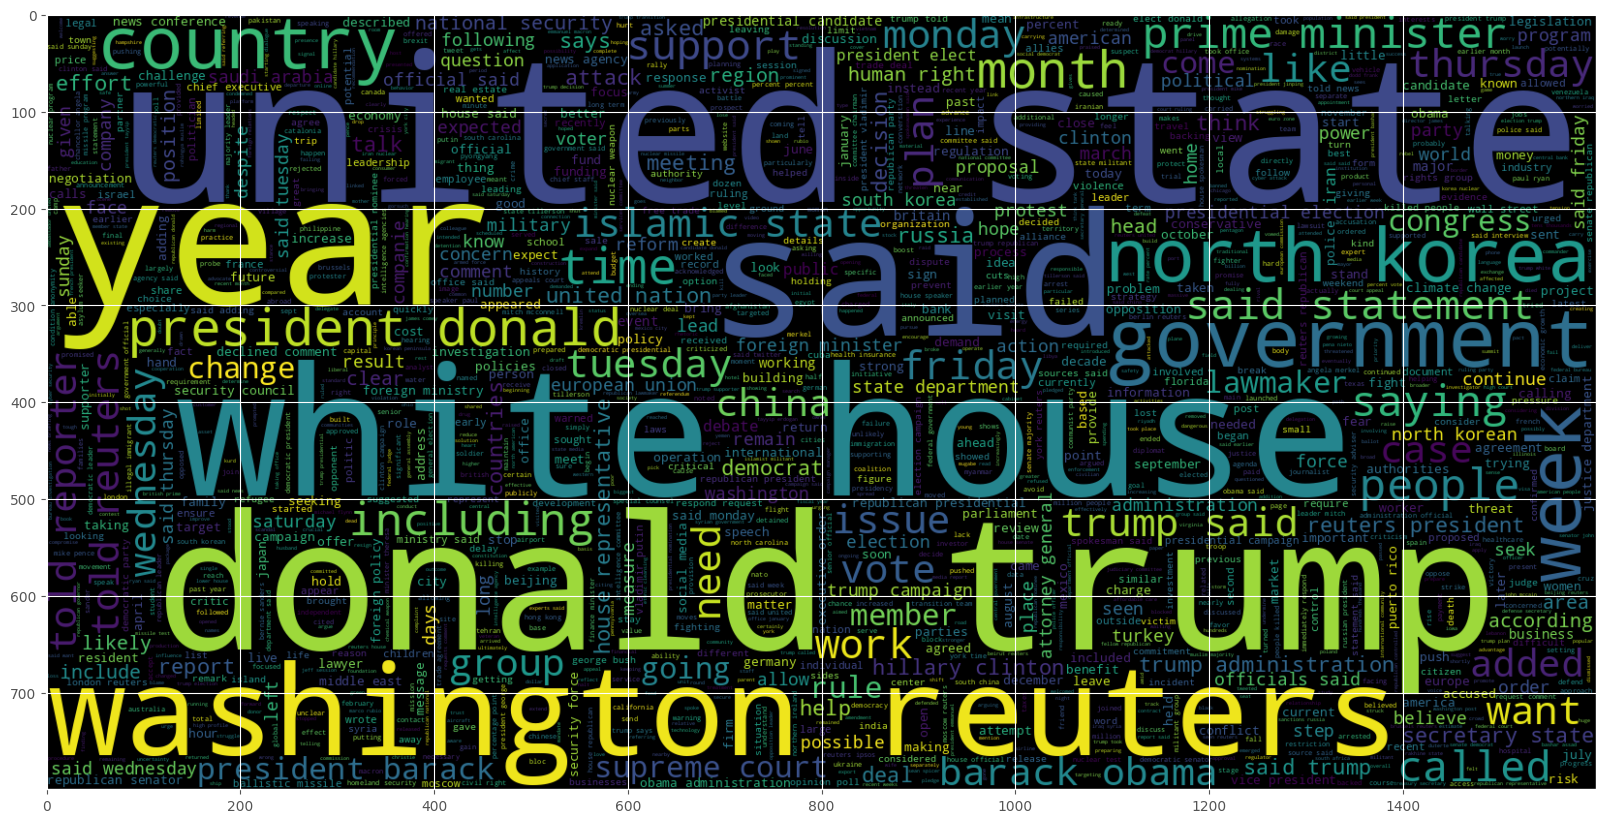

In [124]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 0].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

In [ ]:
maxlen = -1
for doc in df.clean_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is =", maxlen)

The maximum number of words in any document is = 4405


In [ ]:
import plotly.express as px
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.clean_joined], nbins = 100)
fig.show()

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on 'original' column and store the compound score in 'vader_score'
df['vader_score'] = df['clean_joined'].apply(lambda x: sid.polarity_scores(x)['compound'])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


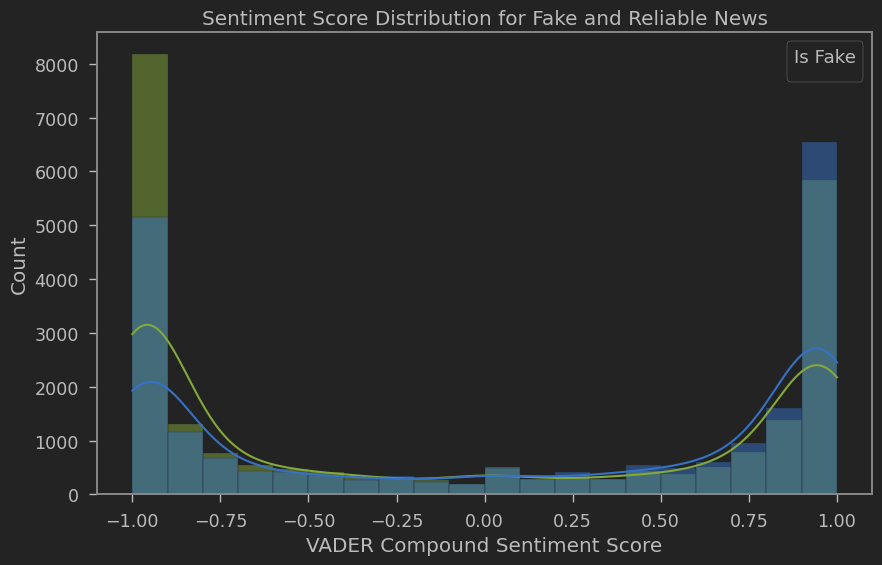

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='vader_score', hue='isfake', kde=True, bins=20)
plt.title('Sentiment Score Distribution for Fake and Reliable News')
plt.xlabel('VADER Compound Sentiment Score')
plt.legend(title='Is Fake')
plt.show()

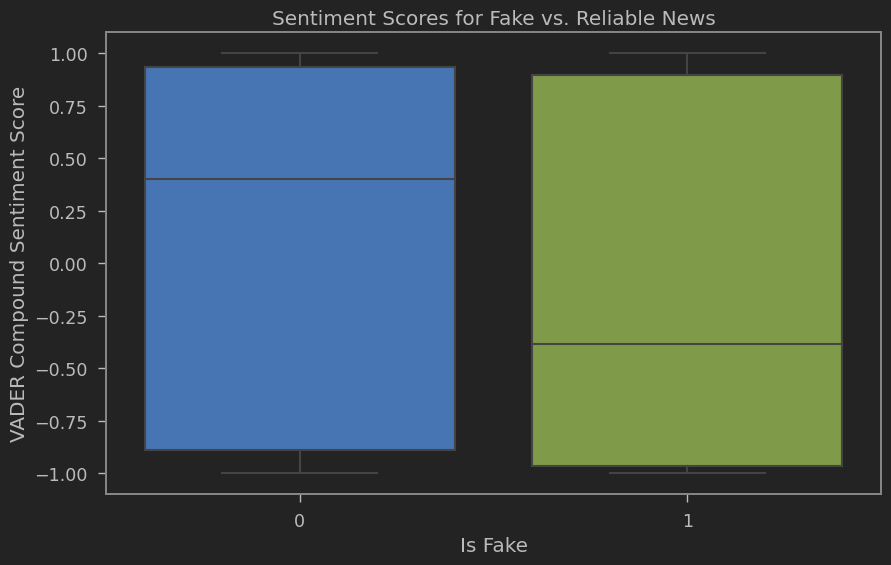

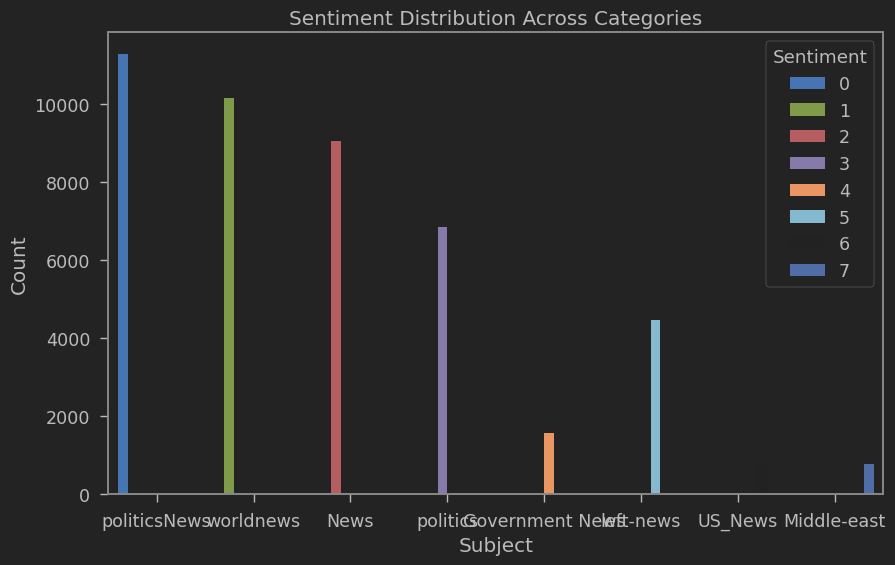

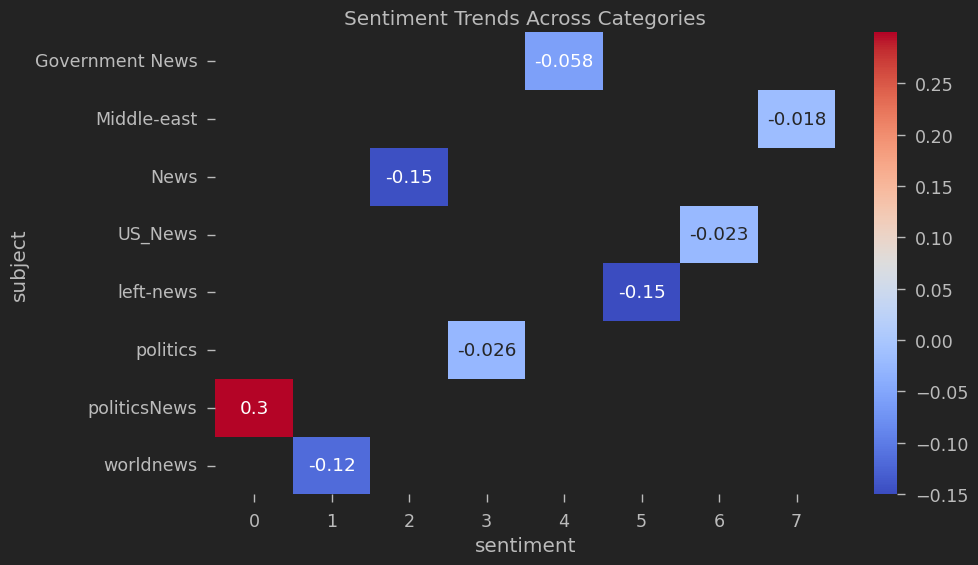

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot of sentiment scores for fake and reliable news
plt.figure(figsize=(10, 6))
sns.boxplot(x='isfake', y='vader_score', data=df)
plt.title('Sentiment Scores for Fake vs. Reliable News')
plt.xlabel('Is Fake')
plt.ylabel('VADER Compound Sentiment Score')
plt.show()

# Bar plot showing counts of positive, negative, and neutral sentiments for each category
plt.figure(figsize=(10, 6))
sns.countplot(x='subject', hue='sentiment', data=df)
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

# Scatter plot of sentiment scores vs. text length
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='text_length', y='vader_score', data=df)
# plt.title('Sentiment Score vs. Text Length')
# plt.xlabel('Text Length')
# plt.ylabel('VADER Compound Sentiment Score')
# plt.show()

# Heatmap for sentiment trends across categories
heatmap_data = df.pivot_table(index='subject', columns='sentiment', values='vader_score', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True)
plt.title('Sentiment Trends Across Categories')
plt.show()


In [ ]:
# split data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.clean_joined, df.isfake, test_size = 0.2)
from nltk import word_tokenize


In [ ]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)
print("The encoding for document\n",df.clean_joined[0],"\n is : ",train_sequences[0])

The encoding for document
 budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats say

In [ ]:
# Add padding can either be maxlen = 4406 or smaller number maxlen = 40 seems to work well based on results
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post')
for i,doc in enumerate(padded_train[:2]):
     print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [    1  1093  1609  2850  5308    32   147  7661    25     9    10     1
 22567   580    34   624   469    15     8  2452    94   258    32  1093
  3459  1609  2850  5328  8296   947    32  2935   441     1   319  4721
    19  1233    13    47]
The padded encoding for document 2  is :  [  618    31   353   392    48  1167  9250    46   149  3690     9   618
    31   353   392    48  1167   786  9250   651   126   325    17   273
     2    85  7575  5743   120  1007   283  1094  2182  1302  2278   871
 49711   618  3382   426]


In [ ]:
# Sequential Model
model = Sequential()

# embeddidng layer
model.add(Embedding(total_words, output_dim = 128))
# model.add(Embedding(total_words, output_dim = 240))


# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(128)))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         13914112  
                                                                 
 bidirectional (Bidirectiona  (None, 256)              263168    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 14,210,305
Trainable params: 14,210,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
total_words

108704

In [ ]:
y_train = np.asarray(y_train)
# train the model
model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 2)

Epoch 1/2
506/506 [==============================] - 274s 534ms/step - loss: 0.0444 - acc: 0.9834 - val_loss: 0.0075 - val_acc: 0.9978
Epoch 2/2
506/506 [==============================] - 275s 545ms/step - loss: 0.0023 - acc: 0.9996 - val_loss: 0.0045 - val_acc: 0.9983


In [ ]:
# make detection
detect = model.predict(padded_test)
# if the predicted value is >0.5 it is real else it is fake
detection = []
for i in range(len(detect)):
    if detect[i].item() > 0.5:
        detection.append(1)
    else:
        detection.append(0)
# getting the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), detection)

print("Model Accuracy : ", accuracy)

281/281 [==============================] - 16s 55ms/step
Model Accuracy :  0.9985523385300669


In [ ]:
# get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), detection)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

In [ ]:
# category dict
category = { 0: 'Fake News', 1 : "Reliable News"}


In [ ]:
def load_model_and_tokenizer():
    # Load the tokenizer and total_words from the previous code
    total_words = ...

    tokenizer = Tokenizer(num_words=total_words)
    model = Sequential()
    model.add(Embedding(total_words, output_dim=128))
    model.add(Bidirectional(LSTM(128)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

    # Load the weights for the trained model
    model.load_weights("path_to_model_weights")  # Replace "path_to_model_weights" with the actual path of the model weights file

    return tokenizer, model

In [ ]:
# Function to preprocess and classify the news article
def classify_news_input(input_text, tokenizer, model):
    processed_text = preprocess(input_text)
    sequences = tokenizer.texts_to_sequences([processed_text])
    padded_sequences = pad_sequences(sequences, maxlen=40, padding='post', truncating='post')
    prediction = model.predict(padded_sequences)
    return "Reliable News" if prediction.item() > 0.5 else "Fake News"

# Call the function to load the tokenizer and model
tokenizer, model = load_model_and_tokenizer()

# Test with user input
user_input = input("Enter a news article for classification: ")
result = classify_news_input(user_input, tokenizer, model)
print("The news article is classified as:", result)

TypeError: ignored

-------------------------------------

In [ ]:
def classify_news(input_text, tokenizer, model):
    # Preprocess the input text
    processed_text = preprocess(input_text)

    # Tokenize and pad the processed text
    sequences = tokenizer.texts_to_sequences([processed_text])
    padded_sequences = pad_sequences(sequences, maxlen=40, padding='post', truncating='post')

    # Make prediction using the loaded model
    prediction = model.predict(padded_sequences)

    # If the predicted value is greater than 0.5, it is classified as "Reliable News",
    # otherwise, it is classified as "Fake News"
    if prediction.item() > 0.5:
        return "Reliable News"
    else:
        return "Fake News"


# Call the function to load the tokenizer and model
tokenizer, model = load_model_and_tokenizer()

TypeError: ignored

In [ ]:


# Now, let's say you have a fake news and a reliable news for testing purposes
fake_news = "This is a fake news article with misleading information."
reliable_news = "This is a reliable news article with accurate information."

# Classify the fake news and reliable news using the classify_news function
result_fake = classify_news(fake_news, tokenizer, model)
result_reliable = classify_news(reliable_news, tokenizer, model)

print("Fake News:", result_fake)
print("Reliable News:", result_reliable)


NameError: ignored